# WeatherPy
----

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

url = "https://api.openweathermap.org/data/2.5/weather?q="

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

In [4]:
display(cities)

['faya',
 'yellowknife',
 'hilo',
 'ushuaia',
 'chuy',
 'nemuro',
 'kalmunai',
 'yulara',
 'pandamatenga',
 'georgetown',
 'attawapiskat',
 'xai-xai',
 'atuona',
 'jamestown',
 'provideniya',
 'rikitea',
 'souillac',
 'gasa',
 'kutum',
 'iqaluit',
 'khatanga',
 'kapaa',
 'mahebourg',
 'castro',
 'tasiilaq',
 'sentyabrskiy',
 'grand river south east',
 'tidore',
 'vanino',
 'wad rawah',
 'busselton',
 'punta arenas',
 'cape town',
 'lebu',
 'dinsor',
 'butaritari',
 'pangnirtung',
 'mataura',
 'sibu',
 'saint-joseph',
 'narsaq',
 'amnat charoen',
 'avarua',
 'sitka',
 'benghazi',
 'nosy varika',
 'aranjuez',
 'nikolskoye',
 'kodiak',
 'bethel',
 'leningradskiy',
 'kedougou',
 'sistranda',
 'lokosovo',
 'jiddah',
 'airai',
 'hobart',
 'baltay',
 'kargasok',
 'samarai',
 'barra do garcas',
 'klaksvik',
 'vila',
 'rantoul',
 'east london',
 'cumaribo',
 'port alfred',
 'cabo san lucas',
 'saint george',
 'carnarvon',
 'mapimi',
 'tabas',
 'albany',
 'touros',
 'chaochou',
 'wonthaggi',
 's

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Defining lists to contain the pulled city data.
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

record = 1

# Loop to return city data.
for city in cities:
    try:
        response = requests.get(url + city + "&APPID=" + weather_api_key + "&units=imperial").json()
        print(f"Processing Record {record} | {city}")
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        record += 1
    except Exception:
        print("Not found - skipping.")
        record += 1


Processing Record 1 | faya
Processing Record 2 | yellowknife
Processing Record 3 | hilo
Processing Record 4 | ushuaia
Processing Record 5 | chuy
Processing Record 6 | nemuro
Processing Record 7 | kalmunai
Processing Record 8 | yulara
Processing Record 9 | pandamatenga
Processing Record 10 | georgetown
Processing Record 11 | attawapiskat
Not found - skipping.
Processing Record 12 | xai-xai
Processing Record 13 | atuona
Processing Record 14 | jamestown
Processing Record 15 | provideniya
Processing Record 16 | rikitea
Processing Record 17 | souillac
Processing Record 18 | gasa
Processing Record 19 | kutum
Processing Record 20 | iqaluit
Processing Record 21 | khatanga
Processing Record 22 | kapaa
Processing Record 23 | mahebourg
Processing Record 24 | castro
Processing Record 25 | tasiilaq
Processing Record 26 | sentyabrskiy
Not found - skipping.
Processing Record 27 | grand river south east
Not found - skipping.
Processing Record 28 | tidore
Not found - skipping.
Processing Record 29 | va

Processing Record 231 | beyneu
Processing Record 232 | baykit
Processing Record 233 | tshikapa
Processing Record 234 | nome
Processing Record 235 | akdepe
Processing Record 236 | sayyan
Processing Record 237 | siguiri
Processing Record 238 | teresina
Processing Record 239 | topeka
Processing Record 240 | byron bay
Processing Record 241 | etchoropo
Processing Record 242 | shibata
Processing Record 243 | talnakh
Processing Record 244 | sur
Processing Record 245 | labuhan
Processing Record 246 | wakkanai
Processing Record 247 | wodonga
Processing Record 248 | bambous virieux
Processing Record 249 | kungurtug
Processing Record 250 | toora-khem
Processing Record 251 | olinda
Processing Record 252 | perleberg
Processing Record 253 | pemex
Processing Record 254 | varzea grande
Processing Record 255 | dunedin
Processing Record 256 | cidreira
Processing Record 257 | pevek
Processing Record 258 | kingsville
Processing Record 259 | medeiros neto
Processing Record 260 | korhogo
Processing Record 2

Processing Record 466 | holme
Processing Record 467 | jijiga
Processing Record 468 | tura
Processing Record 469 | navlya
Processing Record 470 | kirkwall
Processing Record 471 | marihatag
Processing Record 472 | shemursha
Processing Record 473 | donskoy
Processing Record 474 | galgani
Not found - skipping.
Processing Record 475 | blackwater
Processing Record 476 | waingapu
Processing Record 477 | kadnikov
Processing Record 478 | aracuai
Processing Record 479 | atbasar
Processing Record 480 | gillette
Processing Record 481 | namanga
Processing Record 482 | nador
Processing Record 483 | tarazona
Processing Record 484 | mmabatho
Processing Record 485 | itapaci
Processing Record 486 | aldan
Processing Record 487 | camana
Not found - skipping.
Processing Record 488 | chilca
Processing Record 489 | shingu
Processing Record 490 | kindu
Processing Record 491 | huarmey
Processing Record 492 | kushmurun
Not found - skipping.
Processing Record 493 | altay
Processing Record 494 | ambodifototra
Not

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
df = pd.DataFrame({'City': city_name, 'Country': country, 'Cloudiness': cloudiness,'date': date,'Humidity': humidity, 'Latitude': lat, 'Longitude': lng, 'Maximum Temp': max_temp, 'Wind Speed': wind_speed})

df.to_csv("Output/random_cities.csv", encoding="utf-8", index=False)

df.count()

City            548
Country         548
Cloudiness      548
date            548
Humidity        548
Latitude        548
Longitude       548
Maximum Temp    548
Wind Speed      548
dtype: int64

In [7]:
df.head()

,City,Country,Cloudiness,date,Humidity,Latitude,Longitude,Maximum Temp,Wind Speed
0,Faya,SA,0,1569364574,60,18.39,42.45,69.80,2.01
1,Yellowknife,CA,75,1569364574,61,62.45,-114.38,46.40,14.99
2,Hilo,US,75,1569364575,58,19.71,-155.08,87.80,9.17
3,Ushuaia,AR,40,1569364556,75,-54.81,-68.31,44.60,28.86
4,Chuy,UY,0,1569364384,87,-33.69,-53.46,54.98,7.81


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

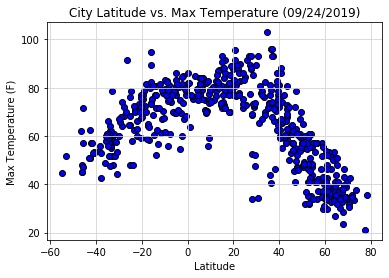

In [8]:
plt.scatter(df["Latitude"],df["Maximum Temp"],edgecolors="black",facecolors="blue")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.title("City Latitude vs. Max Temperature (09/24/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("Output/Fig1.png")
plt.show()

#### Latitude vs. Humidity Plot

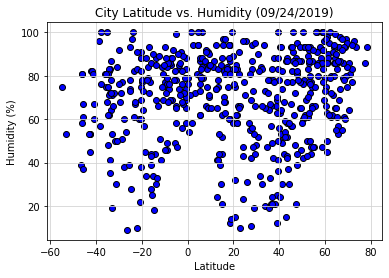

In [9]:
plt.scatter(df["Latitude"],df["Humidity"],edgecolors="black",facecolors="blue")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.title("City Latitude vs. Humidity (09/24/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Output/Fig2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

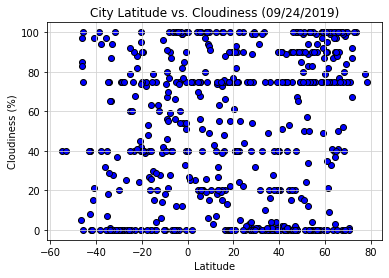

In [10]:
plt.scatter(df["Latitude"],df["Cloudiness"],edgecolors="black",facecolors="blue")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.title("City Latitude vs. Cloudiness (09/24/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Output/Fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

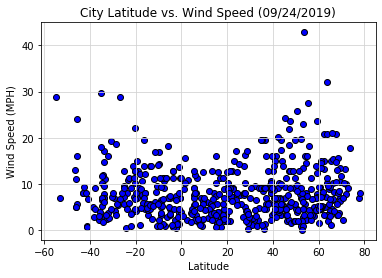

In [11]:
plt.scatter(df["Latitude"],df["Wind Speed"],edgecolors="black",facecolors="blue")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.title("City Latitude vs. Wind Speed (09/24/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.savefig("Output/Fig4.png")
plt.show()

## Linear Regression

In [64]:
# OPTIONAL: Create a function to create Linear Regression plots
def weather_regress(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    print(line_eq)
    print(f"The r-value is {rvalue}.")

In [28]:
# Create Northern and Southern Hemisphere DataFrames
north_df = df.loc[df["Latitude"]>0]
south_df = df.loc[df["Latitude"]<0]

##  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

#### Comments: There is a strong correlation between the temperature and the latitude.

y = -0.78x + 92.81
The r-value is -0.8187552808575527.


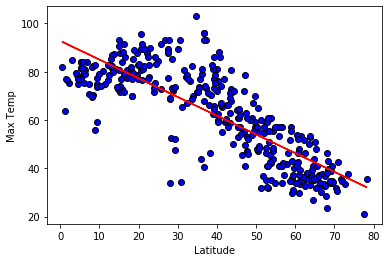

In [65]:
plt.scatter(north_df["Latitude"],north_df["Maximum Temp"],edgecolors="black",facecolors="blue")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
weather_regress(north_df["Latitude"],north_df["Maximum Temp"])
plt.savefig("Output/Fig5.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.59x + 80.01
The r-value is 0.7143178133293084.


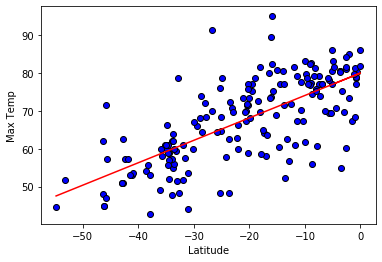

In [66]:
plt.scatter(south_df["Latitude"],south_df["Maximum Temp"],edgecolors="black",facecolors="blue")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
weather_regress(south_df["Latitude"],south_df["Maximum Temp"])
plt.savefig("Output/Fig6.png")
plt.show()

##  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression


#### Comments: There is a no significant correlation between humidity and latitude.

y = 0.15x + 65.26
The r-value is 0.13952166645188324.


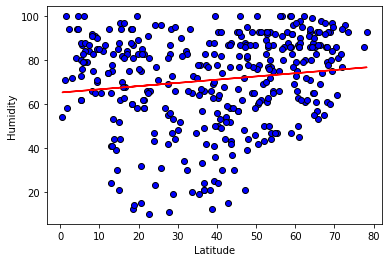

In [70]:
plt.scatter(north_df["Latitude"],north_df["Humidity"],edgecolors="black",facecolors="blue")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
weather_regress(north_df["Latitude"],north_df["Humidity"])
plt.savefig("Output/Fig7.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.21x + 72.72
The r-value is 0.15085634726052796.


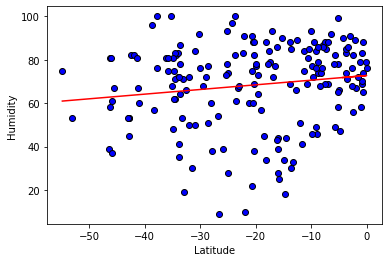

In [67]:
plt.scatter(south_df["Latitude"],south_df["Humidity"],edgecolors="black",facecolors="blue")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
weather_regress(south_df["Latitude"],south_df["Humidity"])
plt.savefig("Output/Fig8.png")
plt.show()

##  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

#### Comments: There is a no significant correlation between cloudiness and latitude.

y = 0.31x + 38.91
The r-value is 0.16113026556277837.


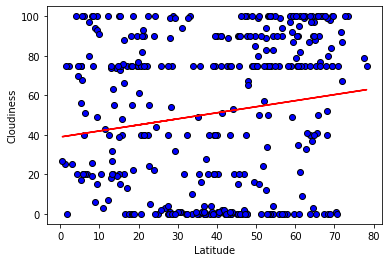

In [71]:
plt.scatter(north_df["Latitude"],north_df["Cloudiness"],edgecolors="black",facecolors="blue")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
weather_regress(north_df["Latitude"],north_df["Cloudiness"])
plt.savefig("Output/Fig9.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.49x + 54.97
The r-value is 0.1908759461038856.


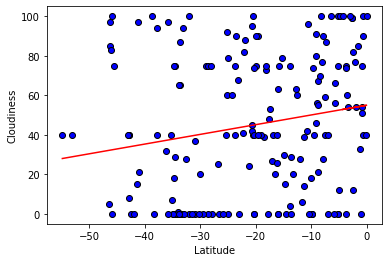

In [68]:
plt.scatter(south_df["Latitude"],south_df["Cloudiness"],edgecolors="black",facecolors="blue")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
weather_regress(south_df["Latitude"],south_df["Cloudiness"])
plt.savefig("Output/Fig10.png")
plt.show()

##  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

#### Comments: There is a no significant correlation between wind speed and latitude.

y = 0.06x + 5.69
The r-value is 0.21147812132195876.


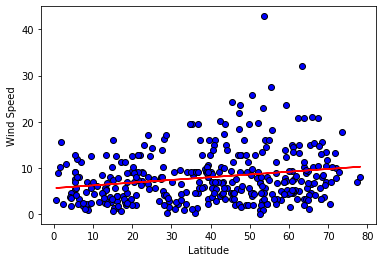

In [72]:
plt.scatter(north_df["Latitude"],north_df["Wind Speed"],edgecolors="black",facecolors="blue")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
weather_regress(north_df["Latitude"],north_df["Wind Speed"])
plt.savefig("Output/Fig11.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.07x + 6.7
The r-value is -0.16938794506721386.


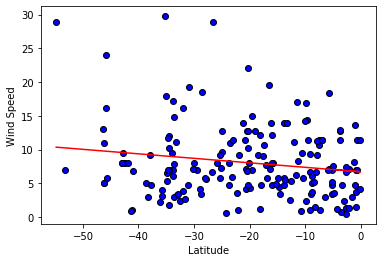

In [69]:
plt.scatter(south_df["Latitude"],south_df["Wind Speed"],edgecolors="black",facecolors="blue")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
weather_regress(south_df["Latitude"],south_df["Wind Speed"])
plt.savefig("Output/Fig12.png")
plt.show()